### PROBLEM STATEMENT
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

##### GOAL 
The aim of the current model is to analyze customer-level data of a leading telecom firm and build a suitable predictive model to identify customers at high risk of churn.

The steps followed to achieve an optimal results are

- Exploring Data
- Data Cleaning & Feature Engineering
- EDA
- Data Modeling
- Model Evaluation
- Summary

In [1]:
#Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',200)

#ML 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,log_loss,accuracy_score
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

### Exploring Data

In [2]:
#Train and test data initial observation
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')

print("Shape of training dataset:",traindf.shape)
print("Shape of testing dataset:",testdf.shape)

print("Training Dataset*****************************************")
traindf.head()

Shape of training dataset: (69999, 172)
Shape of testing dataset: (30000, 171)
Training Dataset*****************************************


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [3]:
#Let's check the description and info
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [4]:
traindf.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


### Data Cleaning & Feature Engineering

In [5]:
# Let's check the missing values in columns
missing_columns = (round(((traindf.isnull().sum()/len(traindf.index))*100),2).to_frame('percent')).sort_values('percent', ascending=False)
missing_columns

,percent
arpu_3g_6,74.90
count_rech_2g_6,74.90
night_pck_user_6,74.90
arpu_2g_6,74.90
date_of_last_rech_data_6,74.90
total_rech_data_6,74.90
av_rech_amt_data_6,74.90
max_rech_data_6,74.90
count_rech_3g_6,74.90
fb_user_6,74.90


In [6]:
#Let's rename some of the columns to make it consistent with others.
traindf.rename(columns={'jun_vbc_3g': 'vbc_3g_6'}, inplace=True)
traindf.rename(columns={'jul_vbc_3g': 'vbc_3g_7'}, inplace=True)
traindf.rename(columns={'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)

testdf.rename(columns={'jun_vbc_3g': 'vbc_3g_6'}, inplace=True)
testdf.rename(columns={'jul_vbc_3g': 'vbc_3g_7'}, inplace=True)
testdf.rename(columns={'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)

In [7]:
#There are some columns with more then 70% of missing data, let's delete them
cols_to_delete = list(missing_columns.index[missing_columns['percent']>70])
cols_to_delete

['arpu_3g_6',
 'count_rech_2g_6',
 'night_pck_user_6',
 'arpu_2g_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'count_rech_3g_6',
 'fb_user_6',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'fb_user_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'max_rech_data_8',
 'total_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8',
 'fb_user_8',
 'count_rech_3g_8']

In [8]:
#dropping these columns in the train and test dataset
traindf = traindf.drop(cols_to_delete,axis=1)
print("Train:", traindf.shape)

testdf = testdf.drop(cols_to_delete,axis=1)
print("Test:",testdf.shape)

Train: (69999, 142)
Test: (30000, 141)


In [9]:
#Let's check the few categorical columns (having date info)
date_cols = [col for col in traindf.columns.to_list() if 'date' in col]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [10]:
traindf[date_cols].describe()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
count,69999,69600,69266,68898,68765,67538
unique,1,1,1,30,31,31
top,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014
freq,69999,69600,69266,11880,12206,10324


In [11]:
# The columns last_date_of_month_* have just one value each and thus won't be helping our analysis, so dropping them
traindf = traindf.drop(date_cols,axis=1)
testdf = testdf.drop(date_cols,axis=1)

print(traindf.shape)
print(testdf.shape)

(69999, 136)
(30000, 135)


In [12]:
# delete the circle_id and id columns as both these having unique values and will not contribute to the analysis
traindf = traindf.drop(['circle_id','id'],axis=1)
testdf = testdf.drop(['circle_id','id'],axis=1)

print(traindf.shape)
print(testdf.shape)

(69999, 134)
(30000, 134)


In [13]:
#Check for rows with more than 50% values missing
cols_with_missing_rows = traindf[traindf.isnull().sum(axis=1)> (len(traindf.columns)//2)]
cols_with_missing_rows.shape

(758, 134)

In [14]:
# Deleting the rows having more than 50% missing values
traindf = traindf.drop(cols_with_missing_rows.index)
print(traindf.shape)

(69241, 134)


In [15]:
#Let's impute 0 as that is relevant to most of these columns
traindf = traindf.fillna(0)
print("Train:", traindf.shape)

testdf = testdf.fillna(0)
print("Test:",testdf.shape)

Train: (69241, 134)
Test: (30000, 134)


In [16]:
#Let's check the missing columns once again
missing_columns = (round(((traindf.isnull().sum()/len(traindf.index))*100),2).to_frame('percent')).sort_values('percent', ascending=False)
missing_columns

,percent
loc_og_t2o_mou,0.0
std_ic_mou_6,0.0
ic_others_8,0.0
ic_others_7,0.0
ic_others_6,0.0
isd_ic_mou_8,0.0
isd_ic_mou_7,0.0
isd_ic_mou_6,0.0
spl_ic_mou_8,0.0
spl_ic_mou_7,0.0


In [17]:
#unique value data
traindf.nunique().sort_values(ascending=False)

arpu_6                61292
arpu_7                61242
arpu_8                60028
total_og_mou_7        33195
total_og_mou_6        33135
total_og_mou_8        32897
total_ic_mou_6        27432
total_ic_mou_7        27418
total_ic_mou_8        27318
offnet_mou_6          26254
offnet_mou_7          26139
offnet_mou_8          25995
loc_ic_mou_6          24442
loc_ic_mou_7          24258
loc_ic_mou_8          24182
loc_og_mou_6          22309
std_og_mou_7          22088
loc_og_mou_7          22012
loc_og_mou_8          21950
std_og_mou_6          21837
std_og_mou_8          21745
onnet_mou_7           20076
onnet_mou_6           20057
onnet_mou_8           19725
loc_ic_t2m_mou_6      19034
loc_ic_t2m_mou_8      19022
loc_ic_t2m_mou_7      18945
loc_og_t2m_mou_6      17848
loc_og_t2m_mou_7      17641
loc_og_t2m_mou_8      17616
std_og_t2m_mou_7      16234
std_og_t2m_mou_6      16059
std_og_t2m_mou_8      15968
std_og_t2t_mou_7      14745
std_og_t2t_mou_6      14554
std_og_t2t_mou_8    

In [18]:
cols = traindf.columns[traindf.nunique()==1]
traindf[cols].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
count,69241.0,69241.0,69241.0,69241.0,69241.0,69241.0,69241.0,69241.0,69241.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
traindf = traindf.drop(cols,axis=1)
testdf = testdf.drop(cols,axis=1)

print(traindf.shape)
print(testdf.shape)

(69241, 125)
(30000, 125)


In [20]:
#Check the dataset
traindf.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability
count,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,...,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000
mean,284.152508,279.943967,280.734946,129.287962,130.164244,127.322345,193.101626,191.660844,188.184067,9.481954,...,0.075086,0.079794,0.075230,0.081642,0.085455,1224.791323,68.212793,65.953605,59.983469,0.095218
std,334.890697,345.233379,352.814151,296.421312,307.700536,306.369077,313.966384,319.609528,319.592794,56.559289,...,0.378941,0.378856,0.573449,0.634365,0.679690,953.511323,267.936493,267.702061,257.174886,0.293518
min,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,94.256000,87.927000,85.726000,5.980000,5.380000,4.560000,30.440000,28.210000,25.280000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,470.000000,0.000000,0.000000,0.000000,0.000000
50%,198.070000,193.194000,193.781000,31.690000,30.010000,28.680000,91.580000,87.190000,84.690000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,874.000000,0.000000,0.000000,0.000000,0.000000
75%,371.572000,367.182000,371.862000,114.640000,110.760000,108.090000,226.130000,220.660000,218.990000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1824.000000,0.000000,0.000000,0.000000,0.000000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,7043.980000,14007.340000,2850.980000,...,16.000000,16.000000,29.000000,33.000000,41.000000,4337.000000,12916.220000,9165.600000,11166.210000,1.000000


### EDA

##### Univariate Analysis

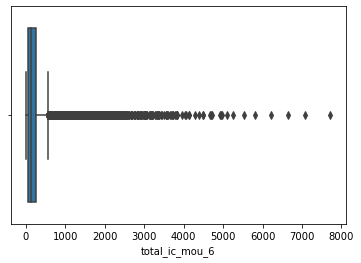

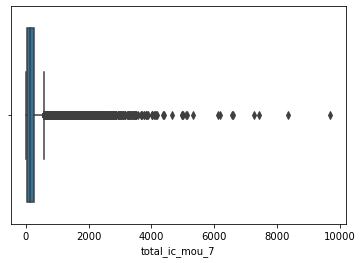

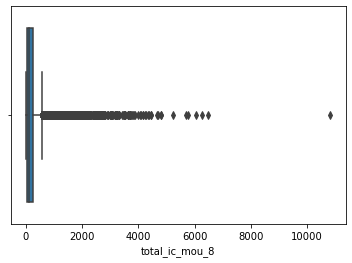

In [21]:
#Let's analyze the incoming calls
cols = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']

for col in cols:
    sns.boxplot(col,data=traindf)
    plt.show()

We can clearly see that there are some outliers in the data. So, let's treat them after some more analysis

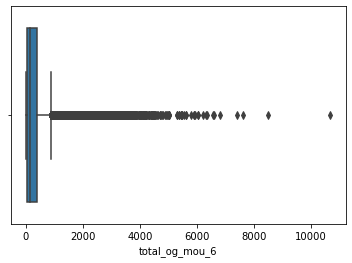

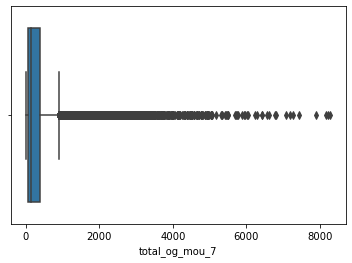

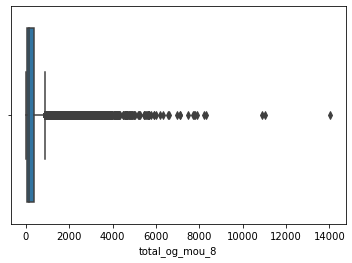

In [22]:
#Let's analyze the outgoing calls
cols = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']

for col in cols:
    sns.boxplot(col,data=traindf)
    plt.show()

Outliers can be seen in the outgoing calls as well

Let's check the volume of 2G and 3G data over the months

##### Bivariate Analysis

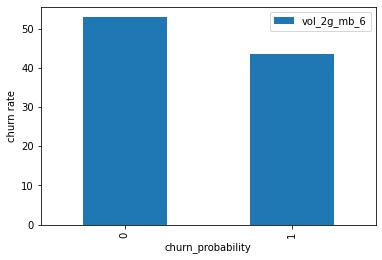

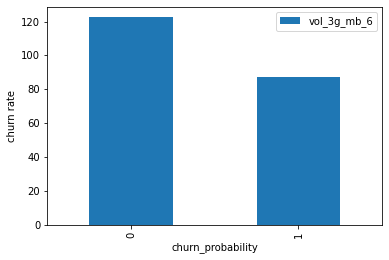

In [24]:
traindf.pivot_table(values='vol_2g_mb_6',index='churn_probability',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

traindf.pivot_table(values='vol_3g_mb_6',index='churn_probability',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

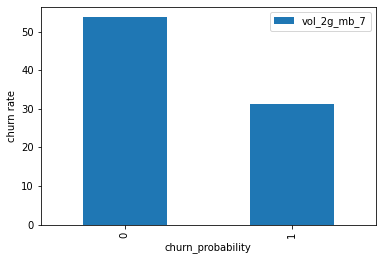

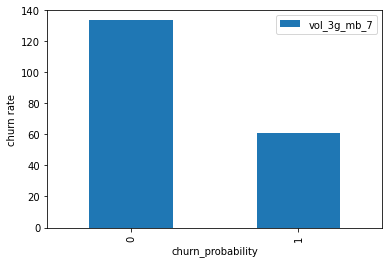

In [25]:
traindf.pivot_table(values='vol_2g_mb_7',index='churn_probability',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

traindf.pivot_table(values='vol_3g_mb_7',index='churn_probability',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

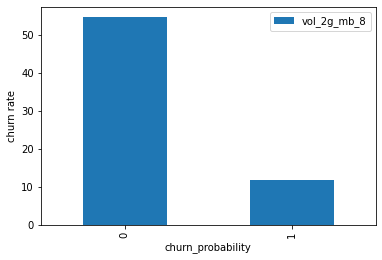

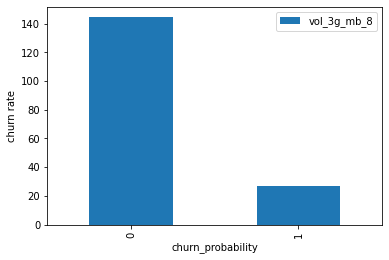

In [26]:
traindf.pivot_table(values='vol_2g_mb_8',index='churn_probability',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

traindf.pivot_table(values='vol_3g_mb_8',index='churn_probability',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

From the above columns, the following inferences can be made
1. The volume of 3G data increases over the months, whereas the 2G data decreases
2. With the increase in 3G data, the churn rate also decreases. Perhaps, customers are happy if the switch to 3G happens quickly.

Let's analyze a heatmap to check correlation between variables. For this, we would just consider the variables for one particular month

In [27]:
cols = [col for col in traindf.columns.to_list() if '_6' in col]
cols

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'vbc_3g_6']

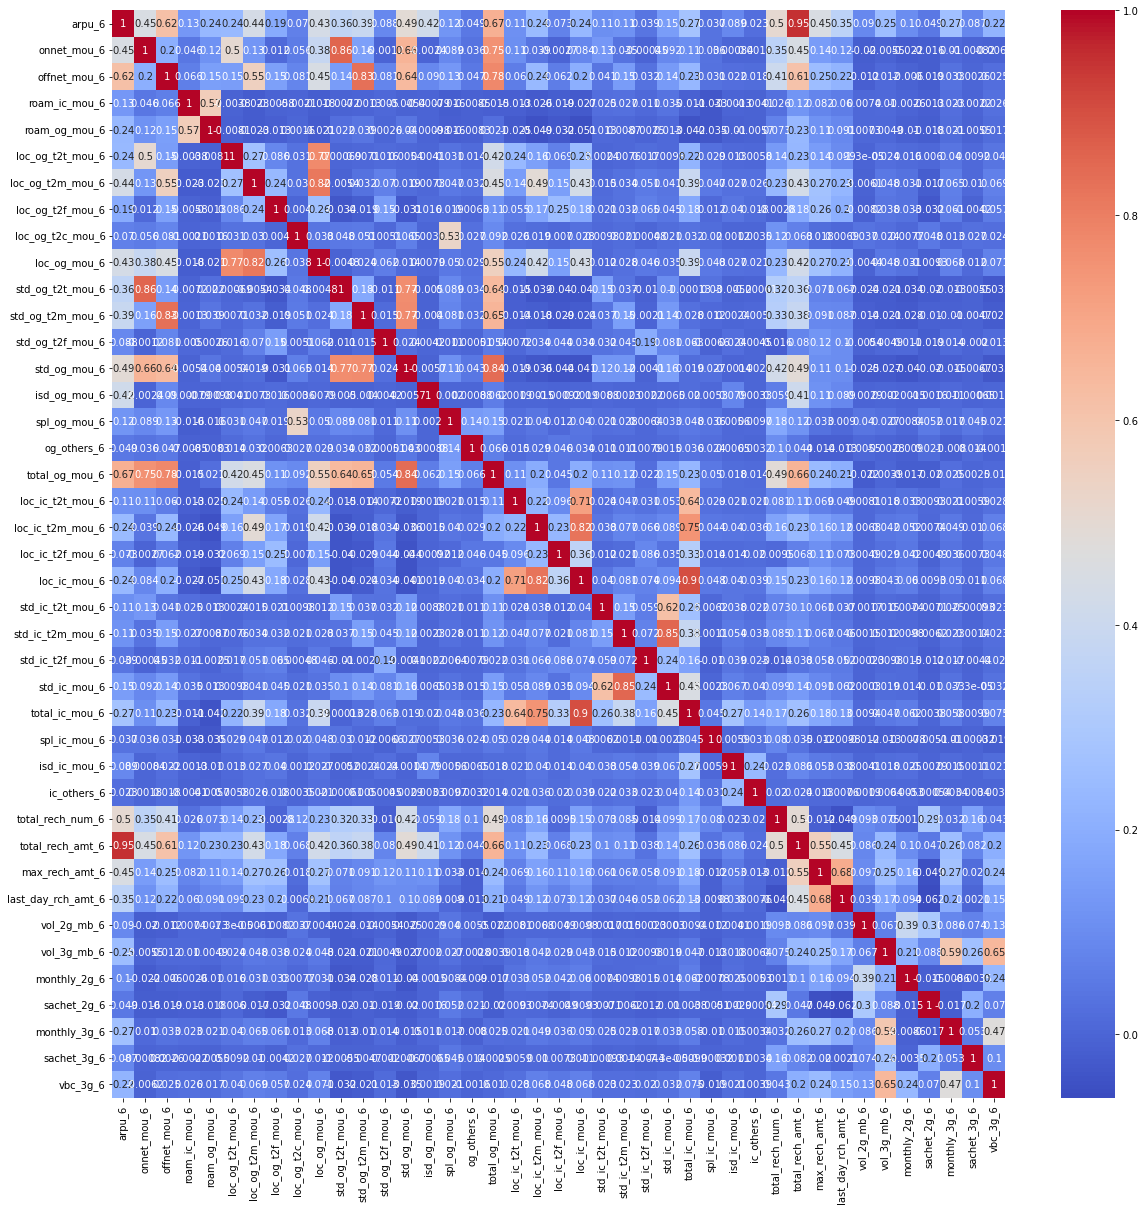

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(traindf[cols].corr(),cmap='coolwarm',annot=True)
plt.show()

Inferences
1. APRU(Average Revenue per user is hightly correlated with total_rech_amt). So, more the amount, more is the revenue which is understandable
2. loc_ic_mou is highly related to total_ic_mou which tells most of the calls made is local
3. std_og_mou_t2t is highly related to onnet_mou and std_og_mou_t2m with offnet_mou. 

We won't be doing any further operations based on correlation as we would rely on our models to do this

In [30]:
#Let's treat the outliers before proceeding with modelling

#Cap the outliers between 0.05 to 0.95
perc = traindf.quantile([0.05,0.95]).values
traindf= np.clip(traindf,perc[0],perc[1])
print(traindf.shape)

(69241, 125)


### Data Modelling 

In [31]:
#Create X and y

X = traindf.drop(['churn_probability'],axis=1)
y = traindf['churn_probability']

In [32]:
# Splitting data into train and test set 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

In [33]:
# try:
#     from sklearn.utils import safe_indexing
# except ImportError:
#     from sklearn.utils import _safe_indexing

In [34]:
# from imblearn.over_sampling import SMOTE

# sm= SMOTE(random_state=100)

# X_train, y_train = sm.fit_resample(X_train,y_train)

In [35]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

In [36]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
0,2.520678,1.512256,0.669849,0.408354,-0.397521,-0.492489,2.850561,2.872035,2.844996,-0.353691,...,4.120838,4.167649,-0.247744,0.0,0.0,0.0,1.668516,-0.354561,-0.003969,3.636801
1,-1.161160,0.490247,0.479159,-0.640378,0.408457,0.739120,-0.855525,2.466233,2.045961,3.662383,...,-0.242669,-0.239943,-0.247744,0.0,0.0,0.0,-0.134996,-0.354561,-0.346289,-0.336863
2,2.520678,2.513871,2.510626,3.046711,3.142568,3.155207,2.850561,2.872035,2.844996,-0.353691,...,-0.242669,-0.239943,-0.247744,0.0,0.0,0.0,-0.986141,-0.352059,-0.346289,-0.336863
3,-0.818247,-0.189915,-0.572897,-0.344518,-0.016142,-0.554280,-0.678356,-0.570853,-0.773079,-0.353691,...,-0.242669,-0.239943,-0.247744,0.0,0.0,0.0,0.248128,-0.354561,-0.346289,0.021559
4,-0.577536,-0.968783,-0.279561,-0.640378,-0.626581,-0.459580,-0.792053,-0.834637,-0.408897,-0.353691,...,-0.242669,-0.239943,-0.247744,0.0,0.0,0.0,-0.635669,-0.354561,-0.346289,-0.336863


In [37]:
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
0,2.520678,1.591461,0.592676,-0.640378,-0.478990,-0.497774,2.850561,2.872035,1.583380,-0.353691,...,-0.242669,-0.239943,-0.247744,0.0,0.0,0.0,0.337378,-0.354561,-0.346289,-0.336863
1,0.856531,1.248811,0.444649,3.126102,3.142568,2.231233,-0.473670,-0.002681,-0.370344,-0.353691,...,-0.242669,-0.239943,-0.247744,0.0,0.0,0.0,-0.755396,-0.354561,-0.346289,-0.336863
2,0.196697,-1.138946,0.774273,-0.580757,-0.626581,0.938400,1.326668,-0.834637,2.362807,0.350472,...,-0.242669,-0.239943,-0.247744,0.0,0.0,0.0,-0.786960,-0.354561,-0.346289,-0.336863
3,2.079350,0.178224,0.065832,3.126102,1.812779,1.687508,-0.854349,-0.777910,-0.771393,-0.353691,...,-0.242669,-0.239943,-0.247744,0.0,0.0,0.0,-1.023147,-0.354561,-0.346289,-0.336863
4,-0.854909,-0.740524,-0.322014,-0.519514,-0.536884,-0.263446,-0.704082,-0.600174,-0.300234,-0.353691,...,-0.242669,-0.239943,-0.247744,0.0,0.0,0.0,-0.985052,-0.354561,-0.346289,-0.336863


##### Model with PCA

In [38]:
pca = PCA(random_state=100)

In [39]:
pca.fit(X_train)

PCA(random_state=100)

In [40]:
pca.components_

array([[ 1.57537506e-01,  1.70441201e-01,  1.61320641e-01, ...,
         4.39628446e-02,  4.36725530e-02,  4.05254081e-02],
       [ 6.51306444e-02,  8.44886254e-02,  7.24440538e-02, ...,
        -6.21820206e-02, -6.18136161e-02, -6.04106624e-02],
       [ 7.04727898e-02,  8.28450144e-02,  8.43526177e-02, ...,
         2.68874885e-01,  2.74158862e-01,  2.61918408e-01],
       ...,
       [ 0.00000000e+00,  2.30552106e-17,  5.78834594e-18, ...,
         2.12010313e-18, -1.47318442e-17,  1.10436119e-17],
       [-0.00000000e+00,  1.18657142e-18, -9.59556117e-19, ...,
        -1.88214291e-18,  1.19837595e-17, -9.11178290e-18],
       [-0.00000000e+00,  1.72336482e-17,  8.17524749e-18, ...,
        -1.07410039e-19, -1.29311503e-18,  9.14136351e-19]])

In [41]:
# Cumulative variance of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.18274695 0.28216571 0.34191928 0.38917045 0.42781215 0.46173112
 0.49111797 0.51712046 0.54110746 0.56257462 0.58312913 0.60287852
 0.62114192 0.63706394 0.65234547 0.6671311  0.68146158 0.6947239
 0.70728172 0.71792171 0.72798787 0.73730978 0.74659269 0.7554319
 0.764053   0.77230024 0.78007328 0.78781014 0.79542905 0.80264766
 0.80975972 0.81668629 0.82320357 0.82960617 0.83577384 0.84148809
 0.84705048 0.85241803 0.85762239 0.8627894  0.86780233 0.87268423
 0.87735926 0.8819794  0.88652951 0.89088395 0.89516644 0.89939173
 0.90352192 0.9075898  0.91158198 0.91525882 0.91885086 0.92240232
 0.92577254 0.92902683 0.93216862 0.93518461 0.93794632 0.94066627
 0.94328712 0.94579762 0.94828069 0.95070687 0.95309453 0.95539178
 0.9576042  0.95975976 0.96188528 0.96397261 0.96599812 0.96800232
 0.96993296 0.97185676 0.97368777 0.97543285 0.97717292 0.97876401
 0.98030492 0.98179586 0.98318622 0.98448037 0.9857385  0.9869074
 0.98802222 0.98912148 0.99006681 0.99094433 0.99181172 0.9926243

Text(0, 0.5, 'Cumulative Variance')

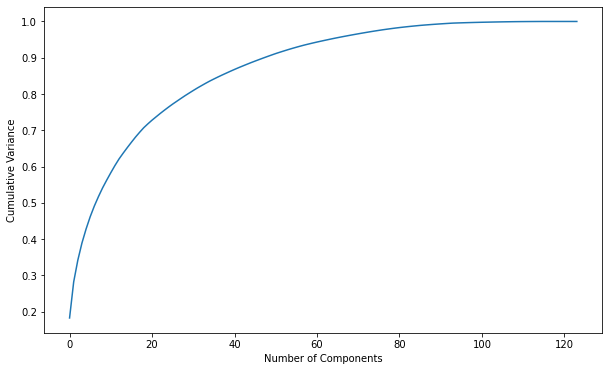

In [42]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [44]:
#We can observe that around 72 components can explain more than 97% of the variance. Let's select 72 for our final pca components
fin_pca = IncrementalPCA(n_components=72)

In [45]:
X_train_pca = fin_pca.fit_transform(X_train)

In [46]:
X_test_pca = fin_pca.transform(X_test)

##### Logistic Regression with PCA

In [47]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 200, 500, 1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 200, 500, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [48]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9184286539572503 at C = 100


In [49]:
lr = LogisticRegression(C=best_C)
lr_best = lr.fit(X_train_pca, y_train)

In [50]:
y_train_pred = lr_best.predict(X_train_pca)

In [51]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

Training Accuracy: 0.9197958790679761


In [52]:
# Prediction on the test set
y_test_pred = lr_best.predict(X_test_pca)

In [54]:
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("")
print(classification_report(y_test,y_test_pred))

Test Accuracy:  0.9242100398590491

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15683
           1       0.71      0.33      0.45      1628

    accuracy                           0.92     17311
   macro avg       0.82      0.66      0.70     17311
weighted avg       0.91      0.92      0.91     17311



##### Decision Tree Classifier with PCA

In [55]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=100)

grid_search = GridSearchCV( estimator = dtree,
                            n_jobs=-1,
                            param_grid = param_grid, 
                            scoring= 'accuracy',
                            cv = 5, 
                            verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy', verbose=1)

In [56]:
print("Best accuracy:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best accuracy:- 0.9172347390718276
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)


In [57]:
# Model with optimal hyperparameters
dt_pca_model = grid_search.best_estimator_

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [58]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [59]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

Training Accuracy: 0.931735027922203


In [60]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("")
print(classification_report(y_test,y_test_pred))

Test Accuracy: 0.9188954999711166

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     15683
           1       0.60      0.41      0.49      1628

    accuracy                           0.92     17311
   macro avg       0.77      0.69      0.72     17311
weighted avg       0.91      0.92      0.91     17311



##### Random Forest Classifier with PCA

In [61]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=20,
                             n_estimators=100)

# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=50,
                       min_samples_split=50)

In [62]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [63]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

Training Accuracy: 0.9293086847679569


In [64]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("")
print(classification_report(y_test,y_test_pred))

Test Accuracy: 0.9219571370804691

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15683
           1       0.70      0.30      0.42      1628

    accuracy                           0.92     17311
   macro avg       0.82      0.64      0.69     17311
weighted avg       0.91      0.92      0.91     17311



##### XGBoost with PCA

###### XGBoost without hyperparameter tuning

In [66]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [67]:
# Fit the model to our train and target
xgb_cfl.fit(X_train_pca, y_train)  # default 
# Get our predictions
y_train_pred = xgb_cfl.predict(X_train_pca)

In [68]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("")
print(classification_report(y_test,y_test_pred))

Training Accuracy: 0.9831503947621798
Test Accuracy: 0.9219571370804691

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15683
           1       0.70      0.30      0.42      1628

    accuracy                           0.92     17311
   macro avg       0.82      0.64      0.69     17311
weighted avg       0.91      0.92      0.91     17311



###### XGBoost using hyperparameter tuning

In [69]:
#Perform Hypertuning on this
params = {
        'n_estimators' : [100, 200], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'max_depth': [5, 10]
        }

folds = 5

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)

In [70]:
random_search.fit(X_train_pca,y_train)

print('\n Best estimator:')
print(random_search.best_estimator_)
print("")
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

0.9280569998074331

 Best hyperparameters:
{'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1}


In [71]:
y_train_pred = random_search.predict(X_train_pca)
print("Training Accuracy:",accuracy_score(y_train, y_train_pred))

Training Accuracy: 0.9479876757173118


In [72]:
y_test_pred = random_search.predict(X_test_pca)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("")
print(classification_report(y_test,y_test_pred))

Test Accuracy: 0.9292357460574201

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     15683
           1       0.67      0.48      0.56      1628

    accuracy                           0.93     17311
   macro avg       0.81      0.73      0.76     17311
weighted avg       0.92      0.93      0.92     17311



##### Model Evaluation

We have our model accuracies available to us. 
Let's compare the model accuracies

1. Logistic Regression 
  - Training Accuracy: 0.919
  - Test Accuracy: 0.923
2. Decision Tree Classifier
  - Training Accuracy: 0.931
  - Test Accuracy: 0.918
3. Random Forest Classifier
  - Training Accuracy: 0.929
  - Test Accuracy: 0.921
4. XGBoost 
  - Training Accuracy: 0.947
  - Test Accuracy: 0.93

Thus, we can clearly see that XGBoost model outperforms the other models. So, we shall consider it our final model for analysis

##### XGBoost without PCA

Let's generate a model with XGBoost as our final model that will provide the most important features

In [81]:
#Because a XGBoost doesn't need scaling as well. We will recreate  X_train and y_train variables to get variables without normalization

# Splitting data into train and test set 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

In [82]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

In [83]:
#Perform Hypertuning on this
params = {
        'n_estimators' : [100, 200], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'max_depth': [5, 10]
        }

folds = 5

final_random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)

In [84]:
final_random_search.fit(X_train,y_train)

print('\n Best estimator:')
print(final_random_search.best_estimator_)
print("")
print(final_random_search.best_score_ )
print('\n Best hyperparameters:')
print(final_random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

0.9432697862507222

 Best hyperparameters:
{'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1}


In [85]:
y_train_pred = final_random_search.predict(X_train)
print("Training Accuracy:",accuracy_score(y_train, y_train_pred))

Training Accuracy: 0.9509146928557674


In [86]:
y_test_pred = final_random_search.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("")
print(classification_report(y_test,y_test_pred))

Test Accuracy: 0.9457570331003409

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     15683
           1       0.76      0.62      0.68      1628

    accuracy                           0.95     17311
   macro avg       0.86      0.80      0.83     17311
weighted avg       0.94      0.95      0.94     17311



##### Summary

We can observe that the XGBoost generated a very good model which has an overall accuracy of 0.95. The high Precision and Recall also suggest that the final model that we considered is a good model. So, let's check the most important parameters that 

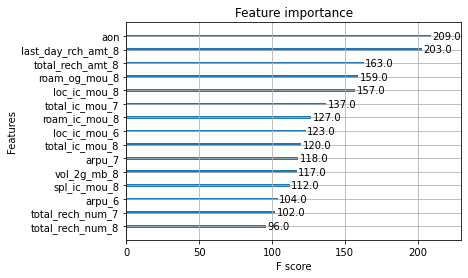

In [95]:
xgb.plot_importance(final_random_search.best_estimator_, max_num_features = 15)
plt.show()

##### Inferences

- The most important features that can determine if a customer will churn or not is 
    - AON(Number of days customer is using the network)
    - Important parameters like Total recharge amount, outgoing minutes while roaming, incoming minutes during local usage, total incoming minutes
    - ARPU (Average revenue per user)
    - Volume of 2G data used.

Based on the above inference, the telecom operator can 
- provide cheaper options for incoming
- quickly migrate to 3G
- focus on the average revenue per user
- Try to keep people happy, who are customers for a long time (AON)

##### Submission.csv generation based on final model

In [96]:
final_test_pred = final_random_search.predict(testdf)

In [98]:
#Create a report based on our final model
df_result = pd.DataFrame(final_test_pred, columns=['churn_probability'],index=np.arange(69999,99999))
df_result.to_csv('Submission.csv',index_label='id')